In [1]:
import gym
import numpy as np
import pandas as pd
from collections import defaultdict
from plotting import plot_values

In [2]:
env = gym.make('Blackjack-v0')

In [3]:
def generate_episode(env, policy):
    """
    Generate an episode (state, action, reward)
    """
    episode = []
    state = env.reset()
    while True:
        action = policy(state)
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        if done:
            break;
        state = next_state
    
    return episode

In [4]:
def accumulated_reward(episode, returns, returns_count, value_function, gamma):
    appearance = []
    all_reward = 0
    
    for x in episode:
        appearance.append(x[0])
    states_in_episode = set(appearance)
    
    for state in states_in_episode:
        first_appearance = next(i for i,x in enumerate(episode) if x[0] == state)
        for i, x in enumerate(episode[first_appearance:]):
            all_reward += x[2] * (gamma ** i)      
        returns[state] = returns[state] + all_reward
        returns_count[state] = returns_count[state] + 1
        value_function[state] = returns[state]/returns_count[state]

    return value_function

In [5]:
def monte_carlo_prediction(policy, env, num_episodes, gamma):
    """
    Calculate the value function under certain policy
    """
    returns = defaultdict(float)
    returns_count = defaultdict(float)
    value_function = {}
    
    for i in range(num_episodes):
        episode = generate_episode(env, policy)
        value_function = accumulated_reward(episode, returns, returns_count, value_function, gamma)
    return value_function

In [6]:
def naive_policy(observation):
    """
    If player's sum < 20 then hit otherwise stand
    """
    return 0 if observation[0] >= 20 else 1

In [7]:
def assembly(policy, env, num_episodes, gammar):
    value_function = monte_carlo_prediction(policy, env, num_episodes=num_episodes, gamma=gammar)
    plot_values(value_function, str(str(num_episodes) + " Steps"))

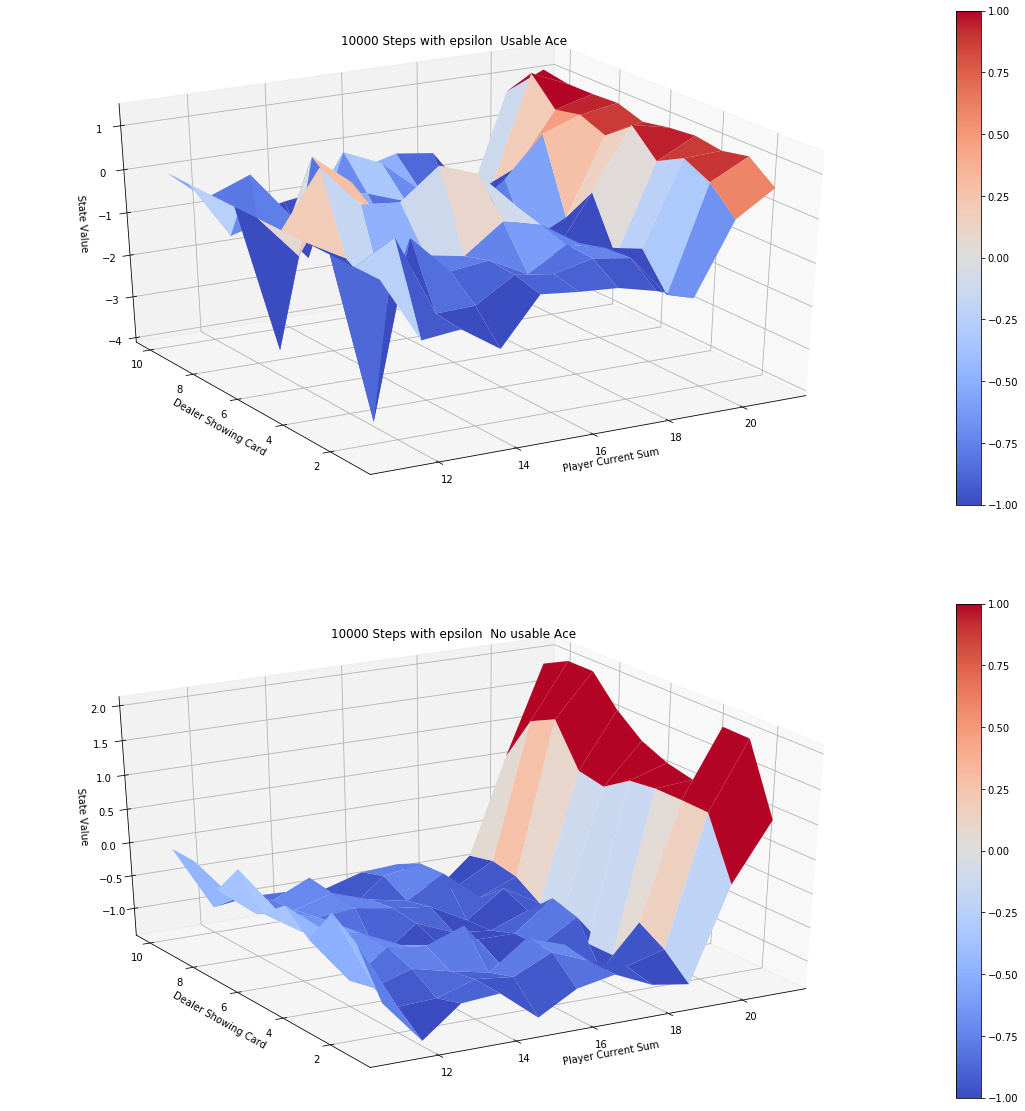

In [8]:
assembly(naive_policy, env, 10000, 1.0)

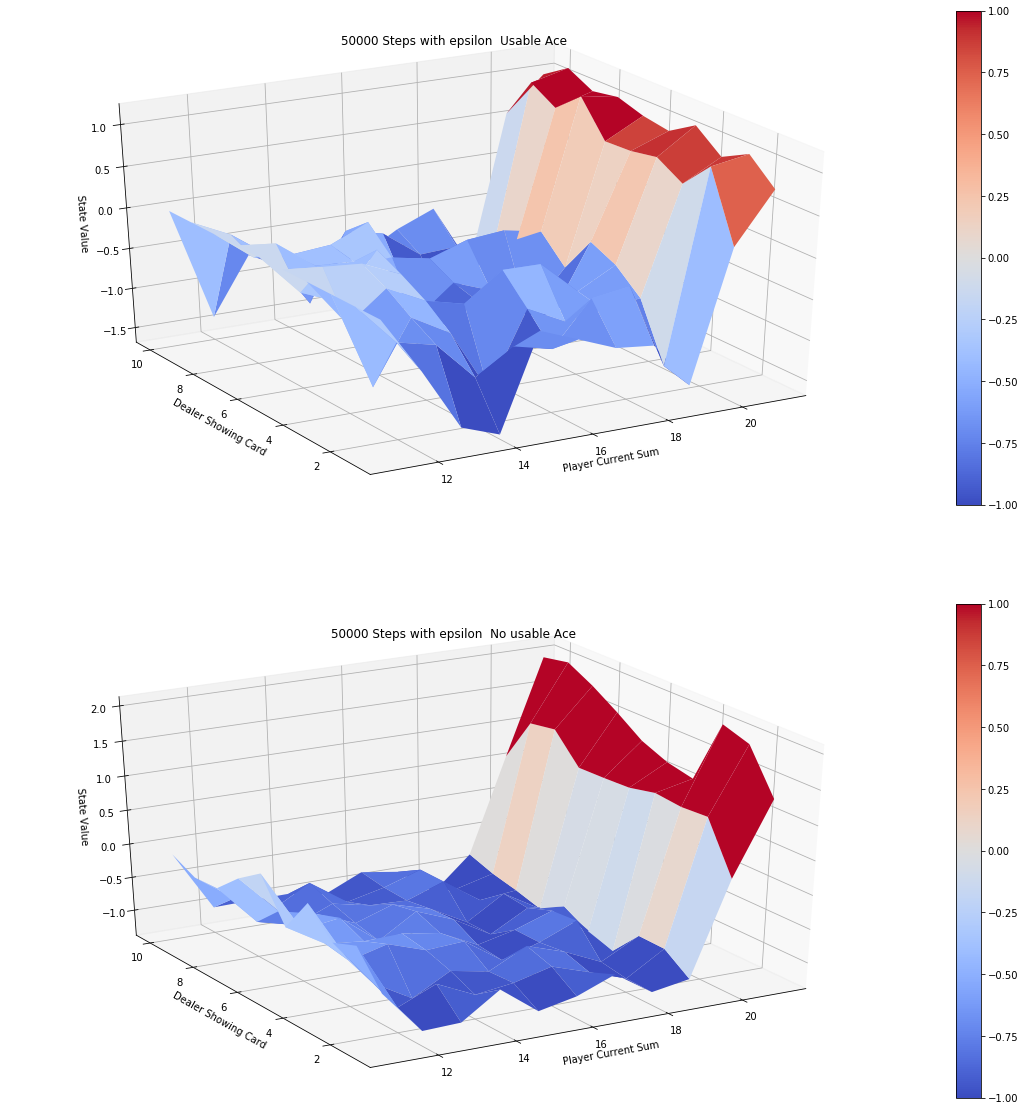

In [9]:
assembly(naive_policy, env, 50000, 1.0)